In [611]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.mlab as mlab

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Load Data Set

In [636]:
raw_data = pd.read_csv("BankChurners.csv",index_col="CLIENTNUM")
raw_data = raw_data.drop(raw_data.columns[-2:],axis=1)

ลบ Columns ที่ไม่สามารถใช้เป็นฟีเจอร์ได้ออกไป

# Preprocessing Data

In [650]:
raw_data["Attrition_Flag"] = raw_data["Attrition_Flag"].astype("category")
raw_data["Education_Level"] = raw_data["Education_Level"].astype("category") 
raw_data["Marital_Status"] = raw_data["Marital_Status"].astype("category") 
raw_data["Income_Category"] = raw_data["Income_Category"].astype("category") 
raw_data["Card_Category"] = raw_data["Card_Category"].astype("category") 
raw_data["Gender"] = raw_data["Gender"].astype("category")

In [651]:
raw_data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [639]:
#Find number of features and show class column
print("The number of features is ",len(raw_data.columns) - 1)
print(raw_data.columns.tolist()[1:],"\n")
print("The label class is \"",raw_data.columns.tolist()[0],"\"")


The number of features is  19
['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] 

The label class is " Attrition_Flag "


## Validate type of features

In [640]:
#Select a sample to verify the data types.
temp_data_dtypes = raw_data.dtypes
temp_columns = temp_data_dtypes.index
temp_validate_data = raw_data[raw_data["Avg_Open_To_Buy"] == 1438.3].iloc[0].tolist()
for name_col, val , val_type in zip(temp_columns,temp_validate_data,temp_data_dtypes):
    print("%-*s  %-*s %s"% (30,name_col,20,val,val_type))

Attrition_Flag                  Attrited Customer    category
Customer_Age                    62                   int64
Gender                          F                    category
Dependent_count                 0                    int64
Education_Level                 Graduate             category
Marital_Status                  Married              category
Income_Category                 Less than $40K       category
Card_Category                   Blue                 category
Months_on_book                  49                   int64
Total_Relationship_Count        2                    int64
Months_Inactive_12_mon          3                    int64
Contacts_Count_12_mon           3                    int64
Credit_Limit                    1438.3               float64
Total_Revolving_Bal             0                    int64
Avg_Open_To_Buy                 1438.3               float64
Total_Amt_Chng_Q4_Q1            1.047                float64
Total_Trans_Amt                 

## Check null values

In [641]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 no

In [642]:
raw_data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

พิจารณาที่คอลัมน์ **Non-Null Count** พบว่ามีจำนวนเท่ากันหมด คือ 10127 แสดงให้เห็นได้ว่า **ไม่มี null value**

## Check duplicate data

In [643]:
dup_df = raw_data.duplicated()     
print("Duplicate Sample is",dup_df.sum())

Duplicate Sample is 0


พบว่ามีค่าเท่ากับ 0 **ไม่มีการซ้ำกันของชุดข้อมูล**

# Exploration Data 

## Show distribution

In [656]:
descDf = raw_data[raw_data["Attrition_Flag"] == "Existing Customer"].describe()
descDf[descDf.columns]

Customer_Age  Dependent_count  Months_on_book  \
count   8500.000000      8500.000000     8500.000000   
mean      46.262118         2.335412       35.880588   
std        8.081157         1.303229        8.021810   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               8500.000000             8500.000000   
mean                   3.914588                2.273765   
std                    1.528949                1.016741   
min                    1.000000                0.000000   
25%                    3.000000                1.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            8500.000000   8500.000000          8500.000000   
mean                2.356353   8726.877518          1256.604118   
std                 1.081436   9084.969807           757.745354   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2602.000000           800.000000   
50%                 2.000000   4643.500000          1364.000000   
75%                 3.000000  11252.750000          1807.000000   
max                 5.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      8500.000000           8500.000000      8500.000000     8500.000000   
mean       7470.273400              0.772510      4654.655882       68.672588   
std        9087.671862              0.217783      3512.772635       22.919011   
min          15.000000              0.256000       816.000000       11.000000   
25%        1184.500000              0.643000      2384.750000       54.000000   
50%        3469.500000              0.743000      4100.000000       71.000000   
75%        9978.250000              0.860000      4781.250000       82.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          8500.000000            8500.000000  
mean              0.742434               0.296412  
std               0.228054               0.272568  
min               0.028000               0.000000  
25%               0.617000               0.055000  
50%               0.721000               0.211000  
75%               0.833000               0.529250  
max               3.714000               0.994000

In [655]:
descDf = raw_data[raw_data["Attrition_Flag"] == "Attrited Customer"].describe()
descDf[descDf.columns]

Customer_Age  Dependent_count  Months_on_book  \
count   1627.000000      1627.000000     1627.000000   
mean      46.659496         2.402581       36.178242   
std        7.665652         1.275010        7.796548   
min       26.000000         0.000000       13.000000   
25%       41.000000         2.000000       32.000000   
50%       47.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       68.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               1627.000000             1627.000000   
mean                   3.279656                2.693301   
std                    1.577782                0.899623   
min                    1.000000                0.000000   
25%                    2.000000                2.000000   
50%                    3.000000                3.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            1627.000000   1627.000000          1627.000000   
mean                2.972342   8136.039459           672.822987   
std                 1.090537   9095.334105           921.385582   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2114.000000             0.000000   
50%                 3.000000   4178.000000             0.000000   
75%                 4.000000   9933.500000          1303.500000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      1627.000000           1627.000000      1627.000000     1627.000000   
mean       7463.216472              0.694277      3095.025814       44.933620   
std        9109.208129              0.214924      2308.227629       14.568429   
min           3.000000              0.000000       510.000000       10.000000   
25%        1587.000000              0.544500      1903.500000       37.000000   
50%        3488.000000              0.701000      2329.000000       43.000000   
75%        9257.500000              0.856000      2772.000000       51.000000   
max       34516.000000              1.492000     10583.000000       94.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          1627.000000            1627.000000  
mean              0.554386               0.162475  
std               0.226854               0.264458  
min               0.000000               0.000000  
25%               0.400000               0.000000  
50%               0.531000               0.000000  
75%               0.692000               0.231000  
max               2.500000               0.999000

* ลักษณะการกระจายตัวของข้อมูลพบว่าส่วนใหญ่มี  **Mean , Std** ที่ใกล้เคียงกันอย่างชัดเจนแต่ในส่วนของฟีเจอร์ **Credit_Limit** ที่พบว่ามีความแตกต่างระหว่างค่า  Mean ของสองคลาสที่เห็นได้ชัด รวมไปถึง **Total_Revolving_Bal** ที่มี Mean แตกต่างชัดเจน และมี Std ของคลาส Attrited Customer ที่กว้างกว่า Existing Customer แสดงให้เห็นถึงการกระจายตัวของข้อมูลในคลาส Attrited Customer ที่สูงกว่า นอกจากนี้ที่เห็นได้ชัดอีกฟีเจอร์นั่นก็คือ **Total_Trans_Amt, Total_Trans_Ct และ Total_Ct_Chng_Q4_Q1** ที่มี Mean แตกต่างชัดเจนยกเว้น Std ที่ใกล้เคียงกันระหว่างสองคลาส


* ส่วนค่า **Max , Min** ส่วนใหญ่มีค่าใกล้เคียงกันระหว่าง 2 Class ยกเว้น **Total_Amt_Chng_Q4_Q1** ที่มีค่า Max แตกต่างชัดเจน นอกจากนี้ในส่วนของฟีเจอร์ **Avg_Open_To_buy และ Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct และ Total_Ct_Chng_Q4_Q1** พบว่าค่า Min ในคลาส Attrited Customer นั่นมีค่าที่น้อยกว่าอีกคลาส


* เมื่อพิจาณา **Boundary** จากค่า Min ในแต่ละฟีเจอร์ไม่พบค่าที่ต่ำกว่า 0 (ที่ทำให้อาจป็น Noise หรือ Outlier จากการเก็บข้อมูลได้)

## Bivariate Analysis

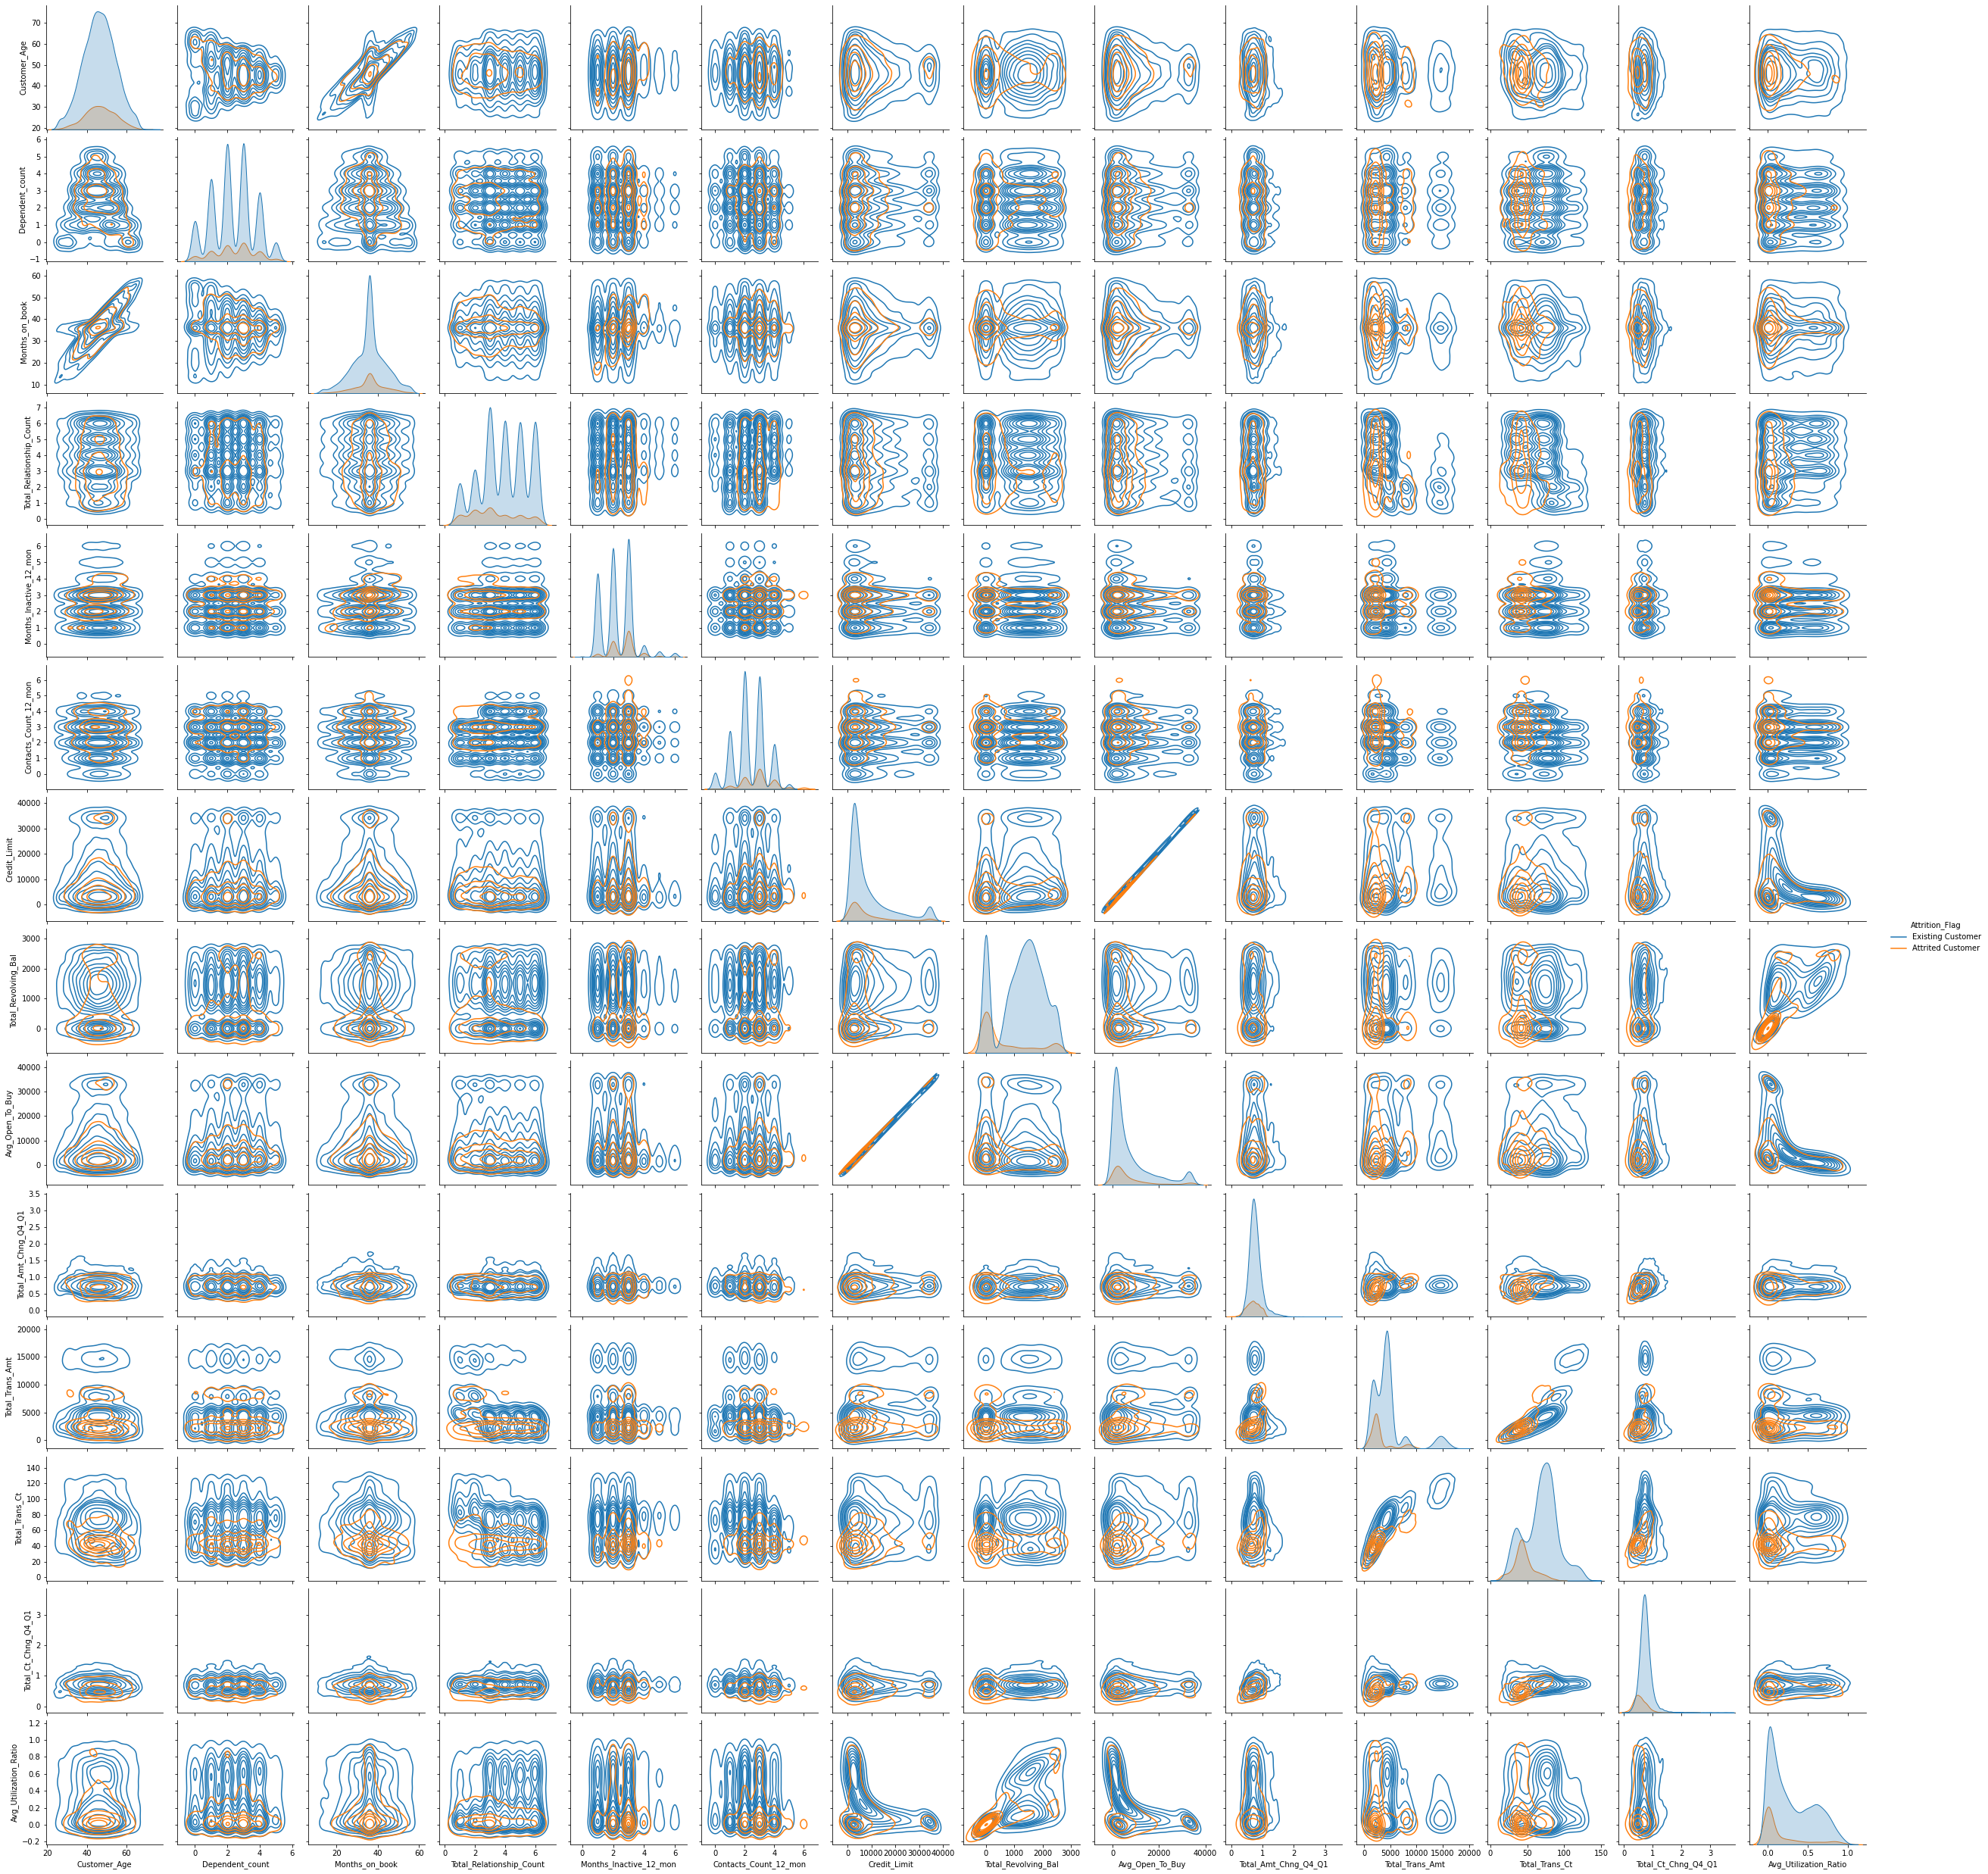

In [161]:
sns.pairplot(raw_data, hue="Attrition_Flag",kind="kde")

> พบว่าฟีเจอร์ของระหว่างสองคลาสนั้น **Overlap** กันเป็นส่วนใหญ่อย่างเห็นได้ชัดเจน

> แต่ยังมีบางฟีเจอร์โดยเฉพาะ **Total_Trans_Amt** ที่มีลักษณะการกระจายตัวที่แตกต่างเมื่อเปรียบเทียบกับฟีเจอร์อื่น ๆ 
รวมไปถึงฟีเจอร์ **Total_Trans_Ct** และ **Total_Ct_Chng_Q4_Q1** ด้วยเช่นกัน **ซึ่งน่าจะเป็น 3 ฟีเจอร์หลัก!! ที่สำคัญที่สามารถใช้ในการแบ่งคลาสได้**

## Univariate Analysis

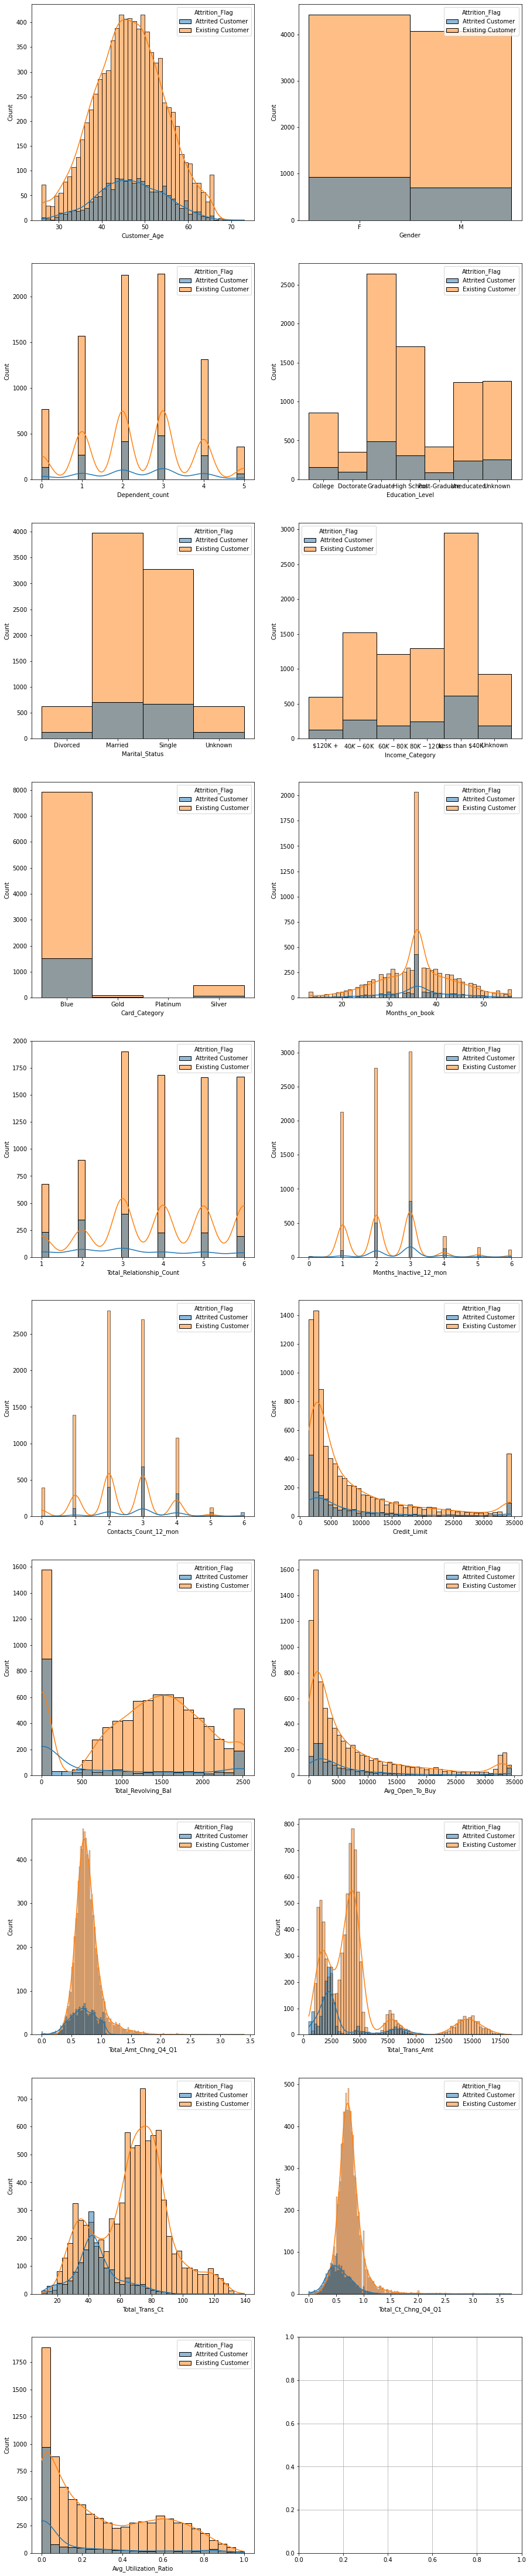

In [657]:
fig,axes=plt.subplots(10,2,figsize=(15, 80))
plt.grid(True)
for idx,column_name in enumerate(raw_data.columns[1:]) :
    row = int(idx / 2) 
    col = int(idx  % 2) 
    if raw_data[column_name].dtypes.name == "category":
        sns.histplot(data=raw_data, x=column_name, hue="Attrition_Flag",ax=axes[row,col])
    else:
        sns.histplot(data=raw_data, x=column_name, hue="Attrition_Flag", kde=True,ax=axes[row,col])
plt.show()

**ฟีเจอร์ส่วนใหญ่มีการกระจายตัวที่ค่อนข้างเหมือนกันของระหว่างสองคลาส ซึ่งฟีเจอร์ที่สามารถสังเกตเห็นความแตกต่างอย่างชัดเจน มีดังนี้**
1. Contacts_Count_12_mon ที่มีการจายตัวไปทางด้านซ้ายมากกว่า 
2. ในส่วนของ Credit Limit พิจารณาที่ค่าเข้าใกล้ 0 พบว่ามีความแตกต่างของความสูงอย่างชัดเจน
3. พิจารณา Avg_Open_To_Buy ที่มักกระจุกตัวเบ้ไปทางซ้ายเป็นส่วนใหญ่
4. นอกจากนี้ Total_Amt_Chng_Q4_Q1 ที่ค่ามากกว่า 1 สามารถเห็นความแตกต่างของสองกลุ่มได้เช่นเดียวกัน
5. ในส่วนของ Total_Trans_Amt ที่ค่ามากกว่า 2500 สามารถเห็นถึงความแตกต่างของสองกลุ่มได้ รวมไปถึงการกระจุกตัวที่ค่าต่ำกว่า 2500 ที่เห็นความแตกต่างสองกลุ่มได้อย่างชัดเจน
6. ในส่วนของ Total_Trans_Ct ในช่วง 60 - 100 ที่ในกลุ่ม Existing Customer นั้นจะมีการกระจุกตัวมากที่สุด แต่เป็นในทางตรงกันข้ามกับกลุ่ม Attrited Customer
7. พิจารณา Total_Ct_Chng_Q4_Q1 ในกลุ่ม Attrited Customer ที่มักกระจุกตัวที่ 0.5 และเป็นระฆังคว่ำที่ยอดไม่สูงมากนัก ส่วนอีกกลุ่มมักกระจุกตัวเข้าใกล้  1 และมียอดของระฆังคว่ำที่สูงชัดเจน
8. สุดท้าย Avg_Utilization_Ratio ที่มีการเบ้ซ้ายอย่างชัดเจนในกลุ่มของ Attrited Customer

## Correlation Plot

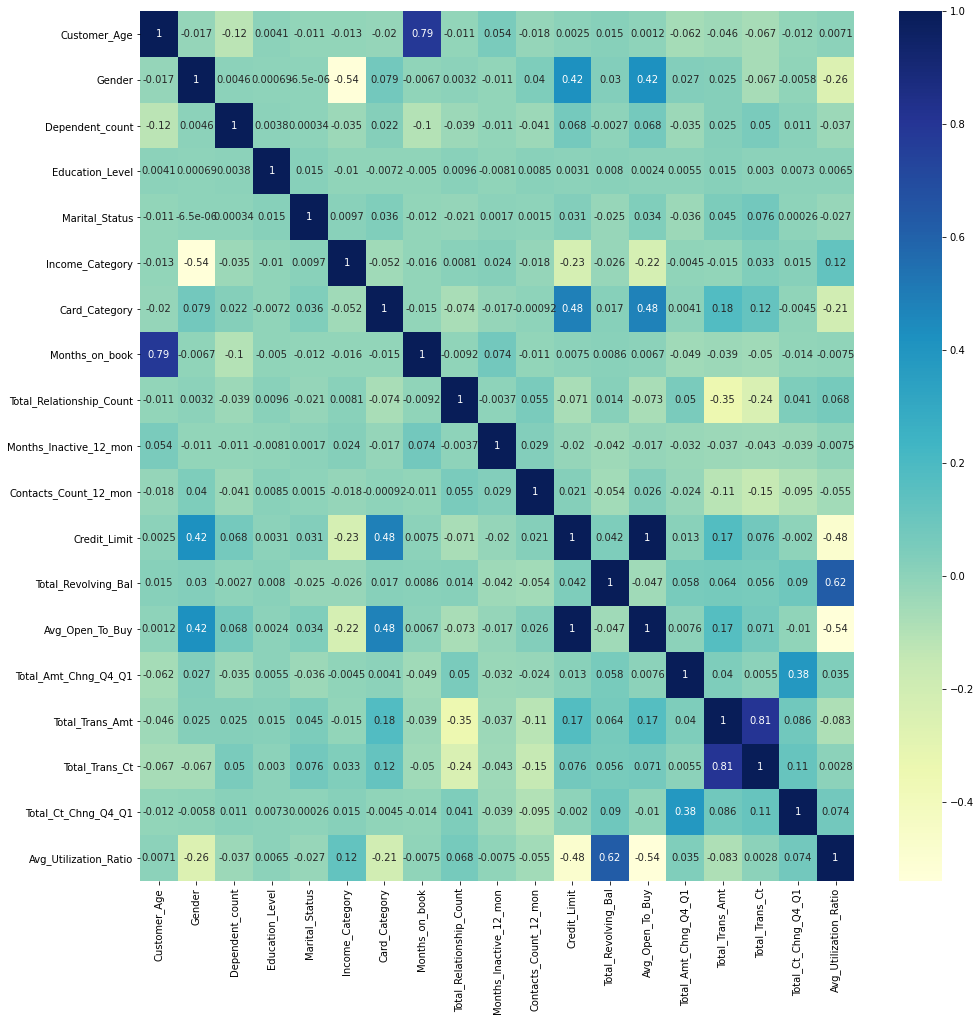

In [653]:
plt.figure(figsize = (16,16))


label_encoder = LabelEncoder()
temp_raw_data = raw_data.copy()
temp_raw_data['Gender'] = label_encoder.fit_transform(temp_raw_data["Gender"])
temp_raw_data['Education_Level'] = label_encoder.fit_transform(temp_raw_data["Education_Level"])
temp_raw_data['Marital_Status'] = label_encoder.fit_transform(temp_raw_data["Marital_Status"])
temp_raw_data['Income_Category'] = label_encoder.fit_transform(temp_raw_data["Income_Category"])
temp_raw_data['Card_Category'] = label_encoder.fit_transform(temp_raw_data["Card_Category"])

ax = sns.heatmap(temp_raw_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Summary the features have correlation value between <= -0.5 and >= 0.5

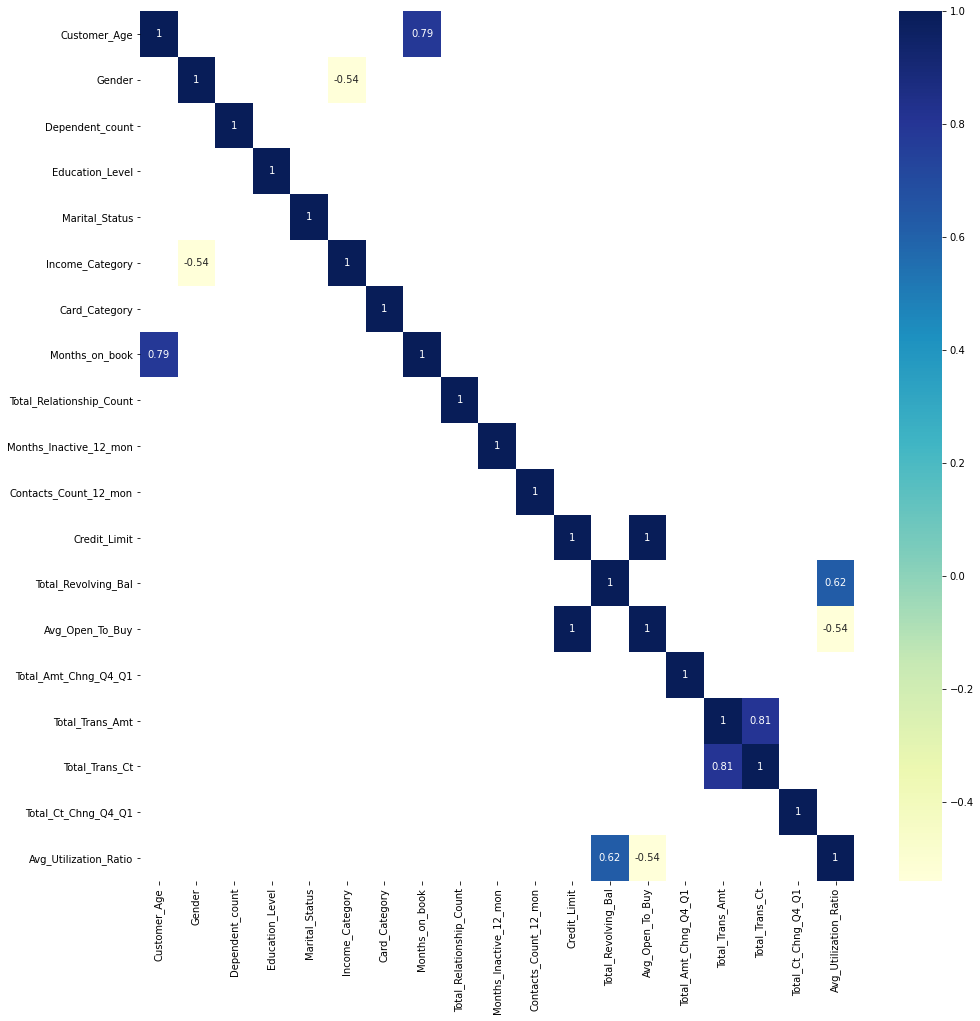

In [277]:
plt.figure(figsize = (16,16))
temp_raw_data_corr = temp_raw_data.corr()
mask_val = ((temp_raw_data_corr >= -0.5) & (temp_raw_data_corr <= 0.5)).astype("int")
ax = sns.heatmap(temp_raw_data_corr,annot=True,cmap="YlGnBu",mask=mask_val)
plt.show()


พบว่ามี 5 คู่ที่มีค่า Correlation ที่อยู่ในช่วง <= -0.5 และ >= 0.5 ดังนี้

                Pair Features                    Correlation Value
    Avg_Open_To_Buy , Credit_Limit               1
    Total_Trans_Amt , Total_Trans_Ct             0.81
    Customer_Age , Months_on_book                0.79
    Total_Revolving_Bal , Avg_Utilization_Ratio  0.62
    Avg_Open_To_Buy ,  Avg_Utilization_Ratio    -0.54
    Income_Category , Gender                    -0.54

    
โดยเฉพาะที่น่าสนใจอย่างยิ่งคือ คู่ฟีเจอร์ Avg_Open_To_Buy , Credit_Limit ที่มีค่าเท่ากับ 1


### Considering correlation that has equal to 1

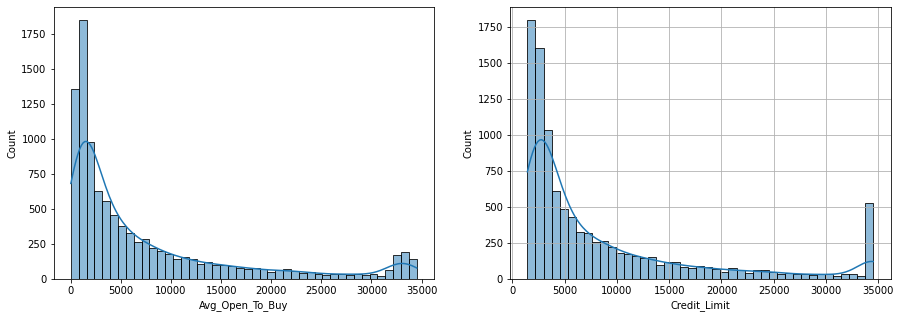

In [654]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plt.grid(True)

sns.histplot(data=raw_data, x="Avg_Open_To_Buy", multiple="stack", kde=True,ax=axes[0])
sns.histplot(data=raw_data, x="Credit_Limit", multiple="stack", kde=True,ax=axes[1])
plt.show()

เมื่อพิจารณาจาก Histogram ของทั้งสองฟีเจอร์ จะพบว่ามีลักษณะการกระจายตัวที่มีแนวโน้มไปในทิศทางเดียวกัน จึงทำให้ความสัมพันธ์ระหว่างฟีเจอร์ Avg_Open_To_Buy และ Credit_Limit ที่ทำให้ **Correlation = 1** ได้

> **แสดงให้เห็นว่าสามารถเลือกฟีเจอร์ใดฟีเจอร์หนึ่งจากสองฟีเจอร์ดังกล่าวนี้ได้ ซึ่งหมายถึงลักษณะอีกฟีเจอร์สามารถแทนที่อีกฟีเจอร์หนึ่งได้**

# Preprocessing data

In [470]:
label_encoder = LabelEncoder()
train_data = raw_data.copy()

print(":: Label encoder starting with 0 label following ::")

train_data['Gender'] = label_encoder.fit_transform(train_data["Gender"])
print("Gender : ",label_encoder.classes_)
train_data['Education_Level'] = label_encoder.fit_transform(train_data["Education_Level"])
print("Education_Level : ",label_encoder.classes_)
train_data['Marital_Status'] = label_encoder.fit_transform(train_data["Marital_Status"])
print("Marital_Status : ",label_encoder.classes_)
train_data['Income_Category'] = label_encoder.fit_transform(train_data["Income_Category"])
print(label_encoder.classes_)
train_data['Card_Category'] = label_encoder.fit_transform(train_data["Card_Category"])
print("Card_Category : ",label_encoder.classes_)

train_data['Attrition_Flag'] = train_data["Attrition_Flag"].str.replace('Existing Customer', "0", regex=False)
train_data['Attrition_Flag'] = train_data["Attrition_Flag"].str.replace('Attrited Customer', "1", regex=False)
train_data['Attrition_Flag'] = train_data['Attrition_Flag'].astype(int)
print("Attrition_Flag : ['Existing Customer' 'Attrited Customer']")
train_data.head()

:: Label encoder starting with 0 label following ::
Gender :  ['F' 'M']
Education_Level :  ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status :  ['Divorced' 'Married' 'Single' 'Unknown']
['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Card_Category :  ['Blue' 'Gold' 'Platinum' 'Silver']
Attrition_Flag : ['Existing Customer' 'Attrited Customer']


Attrition_Flag  Customer_Age  Gender  Dependent_count  \
CLIENTNUM                                                          
768805383               0            45       1                3   
818770008               0            49       0                5   
713982108               0            51       1                3   
769911858               0            40       0                4   
709106358               0            40       1                3   

           Education_Level  Marital_Status  Income_Category  Card_Category  \
CLIENTNUM                                                                    
768805383                3               1                2              0   
818770008                2               2                4              0   
713982108                2               1                3              0   
769911858                3               3                4              0   
709106358                5               1                2              0   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

## Split Train & Blind Test

In [471]:
X,y = train_data.iloc[:,1:],train_data.iloc[:,0]

In [472]:
X_all_train, X_blind, y_all_train, y_blind  = train_test_split(X, y, test_size=0.2, random_state=45)

In [473]:
print("Summary data for training with cross validation")
print("#Class Exist : ",np.sum(y_all_train != "Attrited Customer"),", #Class Attri : ",np.sum(y_all_train == "Attrited Customer"),", Sum = ",len(y_all_train))
print("\nSummary data for blind test")
print("#Class Exist : ",np.sum(y_blind != "Attrited Customer"),", #Class Attri : ",np.sum(y_blind == "Attrited Customer"),", Sum = ",len(y_blind))


Summary data for training with cross validation
#Class Exist :  8101 , #Class Attri :  0 , Sum =  8101

Summary data for blind test
#Class Exist :  2026 , #Class Attri :  0 , Sum =  2026


# Training Process

In [540]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, make_scorer, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [545]:
def class_wise_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #The diagonal entries are the accuracies of each class
    return np.mean(cm.diagonal())


def evaluate(model,X_features,y_out,blind_test=False):
    y_pred = model.predict(X_features)
    
    get_cm = confusion_matrix(y_out, y_pred)
    print("Accuracy : ",accuracy_score(y_out, y_pred))
    print("Class-wise accuracy : ",class_wise_accuracy(y_out, y_pred))
    print("F1 Score : ",f1_score(y_out, y_pred,average='weighted'))
    print("ROC Curve : ",roc_auc_score(y_out,model.predict_proba(X_features)[:,1]))
    sns.heatmap(get_cm, annot=True,cmap='Blues',fmt='g')
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

## Define grid parameters

In [489]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [10,20,30],
    'max_features': [7,8,9,10],
    'min_samples_leaf': [2,3, 4],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [80,100,150]
}

## Train with GridSearchCV using 10-folds cross validation

In [496]:
#Create self scorer
scorer = make_scorer(class_wise_accuracy, greater_is_better=True)

rf = RandomForestClassifier(class_weight="balanced_subsample")
cv = StratifiedKFold(n_splits=10)
grid = GridSearchCV(estimator = rf, param_grid = param_grid, scoring=scorer, n_jobs=-1, return_train_score=True, verbose = 4,cv=cv)
grid.fit(X_all_train.iloc[train_index], y_all_train.iloc[train_index])

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': [7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 100, 150]},
             return_train_score=True, scoring=make_scorer(class_wise_accuracy),
             verbose=4)

> ใช้ **10-Folds Cross Validation** เพื่อต้องการให้มีจำนวนชุดข้อมูลสำหรับฝึกสอนให้ได้มากที่สุด

> และกำหนดพารามิเตอร์ **class_weight** สำหรับ Classifier เพื่อให้สามารถเรียนรู้ **Imbalanced Data** ได้

In [504]:
best_model = grid.best_estimator_
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 150}

## Evaluate model

### Summary after 10-Folds Cross Validation

In [594]:
get_best_model_details = pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]
print("## Best model##")
print("Train Mean Class Wise Accuracy : %s , Std Score : %s" % (get_best_model_details["mean_train_score"],get_best_model_details["std_train_score"]))
print("Test Mean Class Wise Accuracy : %s , Std Score : %s" % (get_best_model_details["mean_test_score"],get_best_model_details["std_test_score"]))


## Best model##
Train Mean Class Wise Accuracy : 0.9885518575148113 , Std Score : 0.0007488442743458036
Test Mean Class Wise Accuracy : 0.9374752775334487 , Std Score : 0.01691104871686912


### Evaluate with blind test

Accuracy :  0.9575518262586377
Class-wise accuracy :  0.9340260369894937
F1 Score :  0.9581216395971862
ROC Curve :  0.9897343228050458


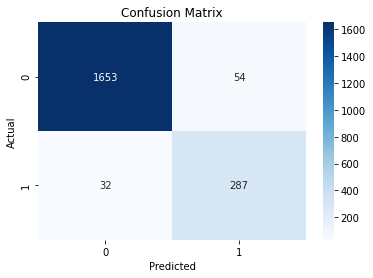

In [546]:
evaluate(best_model,X_blind,y_blind)

> โมเดลนี้สามารถให้ค่า Class-wise accuracy ถึง 93.4% 

> เมื่อเปรียบเทียบ Accuracy ที่ให้ค่าสูงถึง 95.8% ซึ่งมีค่าสูงเนื่องจาก Imbalanced Data ที่ Majority Class มีผลต่อการคำนวนมากที่สุด

> ในส่วน F1 Score มีค่าอยู่ที่ 95.8% 

> โดยมีค่า ROC Curve (ควรจะต้องมีค่าที่เข้าใกล้ 1) ที่ 0.98

# Feature Importances

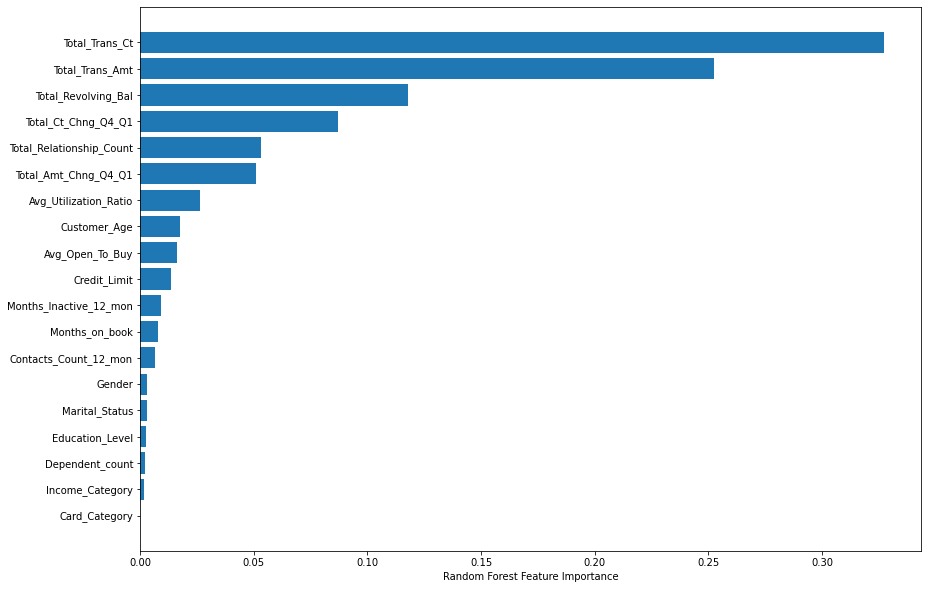

In [524]:
plt.figure(figsize = (14,10))
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(X_all_train.columns[sorted_idx],best_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [578]:
fi_df = pd.DataFrame({'feature': list(X_all_train.columns),
                   'importance': best_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
print("## Top 6 feature importance ##")
fi_df.iloc[:6]

## Top 6 feature importance ##


feature  importance
16            Total_Trans_Ct    0.327317
15           Total_Trans_Amt    0.252598
12       Total_Revolving_Bal    0.117891
17       Total_Ct_Chng_Q4_Q1    0.087173
8   Total_Relationship_Count    0.053059
14      Total_Amt_Chng_Q4_Q1    0.051016

พบว่าปัจจัยที่มีนัยสำคัญในการแบ่งคลาส คือ **Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1, Total_Relationship_Count และ Total_Amt_Chng_Q4_Q1**

ซึ่งส่วนใหญ่สอดคล้องกับผลจากการวิเคราะห์ข้อมูล **Exploratory Data Analysis เบื้องต้น** มีเพียง **Total_Relationship_Count** ที่ให้ค่า Feature Importance เป็นอันดับที่ 5 ที่ไม่ได้ถูกวิเคราะห์และค้นพบจากการทำ EDA 


# Analysis


**สามารถสรุปผลได้ดังนี้**

    - ในลูกค้ากลุ่มยกเลิกบัตรเครดิตสามารถสังเกตได้จาก Total_Trans_Ct ที่มีการกระจุกตัวมักอยู่ในช่วงค่าที่ใกล้คียง 40
    - ในกลุ่มที่ยกเลิกจะมีผลรวมเงินที่ใช้ 12 เดือนล่าสุด Total_Trans_Amt ที่กระจุกตัวมากที่สุดอยู่ในช่วงค่า 2500 และลดลั่นลงมา 
      แสดงให้เห็นว่าจำนวนการใช้เงินรวมในกลุ่มนั้นมักจะมีการใช้เงินในบัตรที่น้อยกว่าหรือใกล้เคียงกับ 2500
    - ในกลุ่มที่บอกเลิกนั้น Total_Revolving_Bal มักมีโน้มแนวที่กระจุกตัวอยู่ที่ค่า 0 มากที่สุดเมื่อพิจารณาจากค่า percentile 
      แสดงให้เห็นว่าคนในกลุ่มนี้มักจะจ่ายเงินครบตรงเวลา จึงทำให้ผลรวม Revolving มีค่าส่วนใหญ่เป็น 0 
    - ในกลุ่มที่บอกเลิกนั้น Total_Ct_Chng_Q4_Q1 มักจะกระจุกตัวที่อัตราส่วน Q4 ต่อ Q1 ที่ 0.5 หรือน้อยกว่านั้น
      ซึ่งต่างจากกลุ่มปกติที่มีอัตราส่วนอยู่ที่ 0.8 - 0.9 และยังแสดงถึงแนวโน้มของ Transaction ที่สูงขึ้นมากกว่ากลุ่มบอกเลิกที่มีแนวโน้มลดลง 
    - Total_Relationship_Count  หมายถึงจำนวน Products  ที่ถือลูกค้าถืออยู่ โดยกลุ่มที่บอกยกเลิกนั้นส่วนใหญ่มีค่าเท่ากับ 3 
      ซึ่งเมื่อเปรียบเทียบกับกลุ่มลูกค้าปกติแล้วมีการกระจุกตัวสูงสุดที่ค่าเดียวกัน แต่เมื่อพิจารณาแนวโน้มการถือครอง Products 
      พบว่าในกลุ่มบอกเลิกนั้นมีการกระจายตัวที่สูงขึ้นในจำนวนที่ลดลง แสดงให้เห็นว่าจะมีการใช้บัตรเครดิตไปซื้อของที่น้อยกว่าเมื่อเปรียบเทียบกับ
      กลุ่มผู้ใช้ปกติ ซึ่งในกลุ่มปกติมักจะมีการกระจุกตัวที่ค่า 3 เป็นต้นไปที่ค่อนข้างสูงและมีค่าใกล้เคียงกัน
    - ในส่วน Total_Amt_Chng_Q4_Q1 พบว่าลูกค้าในกลุ่มบอกเลิกนั้นมีอัตราส่วนที่มากที่สุดอยู่ที่ 1.492000 และมีค่าน้อยที่สุดอยู่ที่ 0 
      ซึ่งแตกต่างจากกลุ่มลูกค้าปกติที่มีค่าอัตราส่วนมากที่สุดที่ 3.397 และน้อยสุดที่ค่า 0.256 
      และมีค่าเฉลี่ยในกลุ่มบอกเลิกที่น้อยกว่ากลุ่มปกติเพียงเล็กน้อย ในส่วนของค่า Std 
      และ percentile มีค่าที่ค่อนข้างใกล้เคียงกัน ดังนั้นอัตราส่วนของฟีเจอร์นี้หากเข้าใกล้ 0 มีโอกาสที่จะบอกเลิกมากที่สุด


In [592]:
print("## Top 3 less feature importance ##")
fi_df.iloc[-3:]

## Top 3 less feature importance ##


feature  importance
2  Dependent_count    0.002251
5  Income_Category    0.001898
6    Card_Category    0.000186

จากตัวอย่าง 3 ฟีเจอร์ที่มีนัยสำคัญน้อยที่สุด เมื่อพิจารณาจาก Histogram ดังที่ได้เสนอไว้ในบทต้นๆ พบว่ามีลักษณะ Distribution ที่ใกล้เคียงกันอย่างเห็นได้ชัด 

**จึงทำให้ทั้งสามฟีเจอร์ดังกล่าวไม่มีความสามารถในการบ่งบอก และแยกแยะกลุ่มลูกค้าทั้งสองประเภทได้อย่างเพียงพอ**

# The approaching improvement model to achieve high accuracy

**ทดลองกับอัลกอริทึม ดังนี้**

    1. Support Vector Classification ใช้เพื่อเปรียบเทียบในส่วนของค่า Accuracy 
    2. XGBoost ใช้เพื่อเปรียบเทียบในส่วนของค่า Accuracy และยังมีความสามารถในการหา Feature Importance ได้
    3. Artificial Neural Network ใช้เพื่อเปรียบเทียบในส่วนของค่า Accuracy โดยใช้ 1 Hidden Layer ในการเรียนรู้
       และยังสามารถนำ Weight ที่ต่อกับ Output มาวิเคราะห์หา Feature Importance ได้อีกด้วย
   
**การทดลองตัดฟีเจอร์**
    
    1. ทดลองตัดฟีเจอร์ที่ให้ค่า Feature Importance ที่ต่ำๆ ออก
    2. ทดลองตัดฟีเจอร์ที่ให้ค่า Correlation สูงออก